In [7]:
import sys
!{sys.executable} -m pip install matplotlib

import psycopg2, geopandas
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline 

# Get the database connection
connection = psycopg2.connect(
    host="localhost",
    database="censusdata",
    user="user",
    password="password",
    port="5432",
)
connection.autocommit = True
cursor = connection.cursor()


<AxesSubplot:>

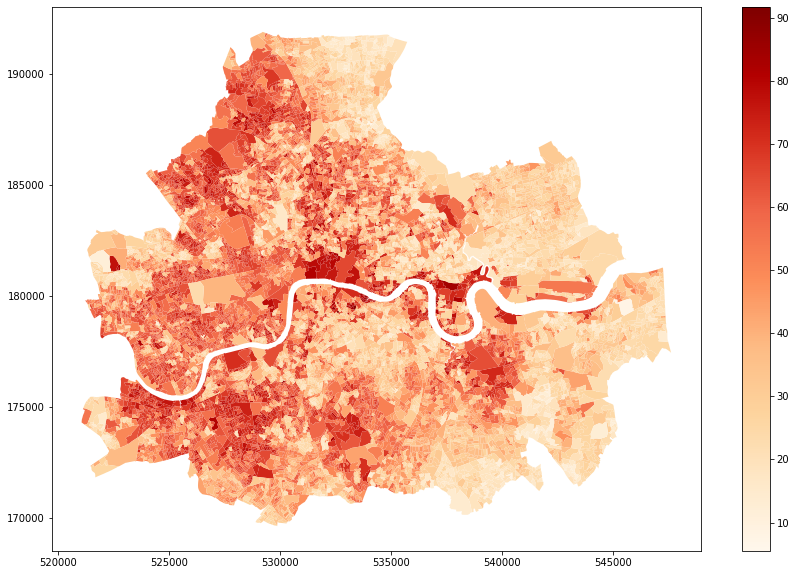

In [8]:
# Highest educated area in London
# Using KS501EW0007 (Level 4 qualifications)
# Level 4 and above: Degree (for example BA, BSc), Higher Degree (for example MA, PhD, PGCE), NVQ Level 4-5, 
# HNC, HND, RSA Higher Diploma, BTEC Higher level, Foundation degree (NI), Professional qualifications (for
# example teaching, nursing, accountancy)

sql = '''
select a.*, b.*, (cast (b.value as float) /a.value)*100 x, oa.*
from  censusdata as a
inner join censusdata as b
on b.geographycode = a.geographycode
inner join "OA" as oa
on a.geographycode = oa."OA11CD"
and a.key = 'KS501EW0001'
and b.key ='KS501EW0007'
and "LAD16NM" in ('Lewisham','Haringey','Lambeth','Southwark','Kensington and Chelsea','Hammersmith and Fulham',
'Camden','Greenwich','Wandsworth','Haringey','Newham','City of London','Islington', 'Barking & Dagenham',
'Tower Hamlets','Hackney','Westminster')
order by x desc
'''


df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry') 
df.plot(column='x', figsize=(15, 10), legend=True, cmap='OrRd')

In [9]:
# Top 20 educated areas in London
df.head(20)

geographycode          key  value     type geographycode          key  \
0      E00168080  KS501EW0001    169  KS501EW     E00168080  KS501EW0007   
1      E00168026  KS501EW0001    216  KS501EW     E00168026  KS501EW0007   
2      E00174673  KS501EW0001    109  KS501EW     E00174673  KS501EW0007   
3      E00167477  KS501EW0001    218  KS501EW     E00167477  KS501EW0007   
4      E00021546  KS501EW0001    172  KS501EW     E00021546  KS501EW0007   
5      E00019812  KS501EW0001    195  KS501EW     E00019812  KS501EW0007   
6      E00171551  KS501EW0001    227  KS501EW     E00171551  KS501EW0007   
7      E00174761  KS501EW0001    236  KS501EW     E00174761  KS501EW0007   
8      E00167681  KS501EW0001    141  KS501EW     E00167681  KS501EW0007   
9      E00167210  KS501EW0001    127  KS501EW     E00167210  KS501EW0007   
10     E00168027  KS501EW0001    265  KS501EW     E00168027  KS501EW0007   
11     E00174672  KS501EW0001    227  KS501EW     E00174672  KS501EW0007   
12     E00020260  KS501EW0001    225  KS501EW     E00020260  KS501EW0007   
13     E00167158  KS501EW0001    241  KS501EW     E00167158  KS501EW0007   
14     E00000019  KS501EW0001    125  KS501EW     E00000019  KS501EW0007   
15     E00020259  KS501EW0001    295  KS501EW     E00020259  KS501EW0007   
16     E00167483  KS501EW0001    287  KS501EW     E00167483  KS501EW0007   
17     E00167751  KS501EW0001    207  KS501EW     E00167751  KS501EW0007   
18     E00168029  KS501EW0001    274  KS501EW     E00168029  KS501EW0007   
19     E00020267  KS501EW0001    201  KS501EW     E00020267  KS501EW0007   

    value     type          x  OBJECTID     OA11CD    LAD11CD    LAD16CD  \
0     155  KS501EW  91.715976    163435  E00168080  E09000028  E09000028   
1     192  KS501EW  88.888889    163382  E00168026  E09000028  E09000028   
2      96  KS501EW  88.073394    169319  E00174673  E09000007  E09000007   
3     191  KS501EW  87.614679    162871  E00167477  E09000028  E09000028   
4     150  KS501EW  87.209302     20932  E00021546  E09000030  E09000030   
5     168  KS501EW  86.153846     19292  E00019812  E09000028  E09000028   
6     194  KS501EW  85.462555    166597  E00171551  E09000022  E09000022   
7     201  KS501EW  85.169492    169396  E00174761  E09000019  E09000019   
8     120  KS501EW  85.106383    163063  E00167681  E09000028  E09000028   
9     108  KS501EW  85.039370    162634  E00167210  E09000030  E09000030   
10    225  KS501EW  84.905660    163383  E00168027  E09000028  E09000028   
11    192  KS501EW  84.581498    169318  E00174672  E09000007  E09000007   
12    190  KS501EW  84.444444     19708  E00020260  E09000028  E09000028   
13    203  KS501EW  84.232365    162582  E00167158  E09000030  E09000030   
14    105  KS501EW  84.000000        12  E00000019  E09000001  E09000001   
15    247  KS501EW  83.728814     19707  E00020259  E09000028  E09000028   
16    240  KS501EW  83.623693    162877  E00167483  E09000028  E09000028   
17    173  KS501EW  83.574879    163131  E00167751  E09000028  E09000028   
18    228  KS501EW  83.211679    163384  E00168029  E09000028  E09000028   
19    166  KS501EW  82.587065     19714  E00020267  E09000028  E09000028   

           LAD16NM     Shape__Are   Shape__Len  \
0        Southwark    9656.750076   393.244754   
1        Southwark   23717.680061   673.880739   
2           Camden    5132.098099   287.739553   
3        Southwark    7809.999313   377.560984   
4    Tower Hamlets    8959.539497   388.282990   
5        Southwark   16325.526443   558.028114   
6          Lambeth   18602.451012   997.097085   
7        Islington   31484.296539  1222.271094   
8        Southwark    6994.449921   433.867901   
9    Tower Hamlets    1484.951302   156.398558   
10       Southwark   13376.092598   608.891345   
11          Camden    4801.102287   287.557402   
12       Southwark   13557.497154   706.942858   
13   Tower Hamlets  203801.210342  2576.078240   
14  City of London   12323.463638   669.634894   
15       

In [7]:
# 20 least educated areas in London
df.tail(20)

geographycode          key  value     type geographycode          key  \
11093     E00017645  KS501EW0001    260  KS501EW     E00017645  KS501EW0007   
11094     E00021493  KS501EW0001    308  KS501EW     E00021493  KS501EW0007   
11095     E00007970  KS501EW0001    239  KS501EW     E00007970  KS501EW0007   
11096     E00008244  KS501EW0001    231  KS501EW     E00008244  KS501EW0007   
11097     E00017878  KS501EW0001    125  KS501EW     E00017878  KS501EW0007   
11098     E00021336  KS501EW0001    189  KS501EW     E00021336  KS501EW0007   
11099     E00016953  KS501EW0001    194  KS501EW     E00016953  KS501EW0007   
11100     E00021497  KS501EW0001    340  KS501EW     E00021497  KS501EW0007   
11101     E00008097  KS501EW0001    260  KS501EW     E00008097  KS501EW0007   
11102     E00008740  KS501EW0001    120  KS501EW     E00008740  KS501EW0007   
11103     E00008502  KS501EW0001    180  KS501EW     E00008502  KS501EW0007   
11104     E00016374  KS501EW0001    204  KS501EW     E00016374  KS501EW0007   
11105     E00167196  KS501EW0001    163  KS501EW     E00167196  KS501EW0007   
11106     E00008245  KS501EW0001    210  KS501EW     E00008245  KS501EW0007   
11107     E00008979  KS501EW0001    242  KS501EW     E00008979  KS501EW0007   
11108     E00021249  KS501EW0001    249  KS501EW     E00021249  KS501EW0007   
11109     E00021591  KS501EW0001    291  KS501EW     E00021591  KS501EW0007   
11110     E00176530  KS501EW0001    890  KS501EW     E00176530  KS501EW0007   
11111     E00009095  KS501EW0001    108  KS501EW     E00009095  KS501EW0007   
11112     E00017668  KS501EW0001    163  KS501EW     E00017668  KS501EW0007   

       value     type          x  OBJECTID     OA11CD    LAD11CD    LAD16CD  \
11093     30  KS501EW  11.538462     17208  E00017645  E09000025  E09000025   
11094     35  KS501EW  11.363636     20887  E00021493  E09000030  E09000030   
11095     27  KS501EW  11.297071      7819  E00007970  E09000011  E09000011   
11096     26  KS501EW  11.255411      8062  E00008244  E09000011  E09000011   
11097     14  KS501EW  11.200000     17422  E00017878  E09000025  E09000025   
11098     21  KS501EW  11.111111     20746  E00021336  E09000030  E09000030   
11099     21  KS501EW  10.824742     16523  E00016953  E09000023  E09000023   
11100     36  KS501EW  10.588235     20891  E00021497  E09000030  E09000030   
11101     27  KS501EW  10.384615      7930  E00008097  E09000011  E09000011   
11102     12  KS501EW  10.000000      8527  E00008740  E09000012  E09000012   
11103     18  KS501EW  10.000000      8308  E00008502  E09000011  E09000011   
11104     19  KS501EW   9.313725     15958  E00016374  E09000023  E09000023   
11105     15  KS501EW   9.202454    162620  E00167196  E09000030  E09000030   
11106     19  KS501EW   9.047619      8063  E00008245  E09000011  E09000011   
11107     21  KS501EW   8.677686      8741  E00008979  E09000012  E09000012   
11108     21  KS501EW   8.433735     20668  E00021249  E09000030  E09000030   
11109     24  KS501EW   8.247423     20965  E00021591  E09000030  E09000030   
11110     69  KS501EW   7.752809    171128  E00176530  E09000011  E09000011   
11111      8  KS501EW   7.407407      8846  E00009095  E09000012  E09000012   
11112      9  KS501EW   5.521472     17230  E00017668  E09000025  E09000025   

             LAD16NM     Shape__Are   Shape__Len  \
11093         Newham   41491.891060   955.262824   
11094  Tower Hamlets   11750.700661   726.291127   
11095      Greenwich   32746.922630  1020.309163   
11096      Greenwich  115759.683609  1870.266703   
11097         Newham   13177.482361   612.165011   
11098  Tower Hamlets   15585.497833   596.459353   
11099       Lewisham   55847.873451  1355.443882   
11100  Tower Hamlets    9704.557228   687.439648   
11101      Greenwich   42814.894447  1634.532420   
11102        Hackney    5656.274803   323.996076   
11103      Greenwich   18187.895813   809.407007   
11104       Lewisham   32799.610039  1162.341731   
11105  Tow

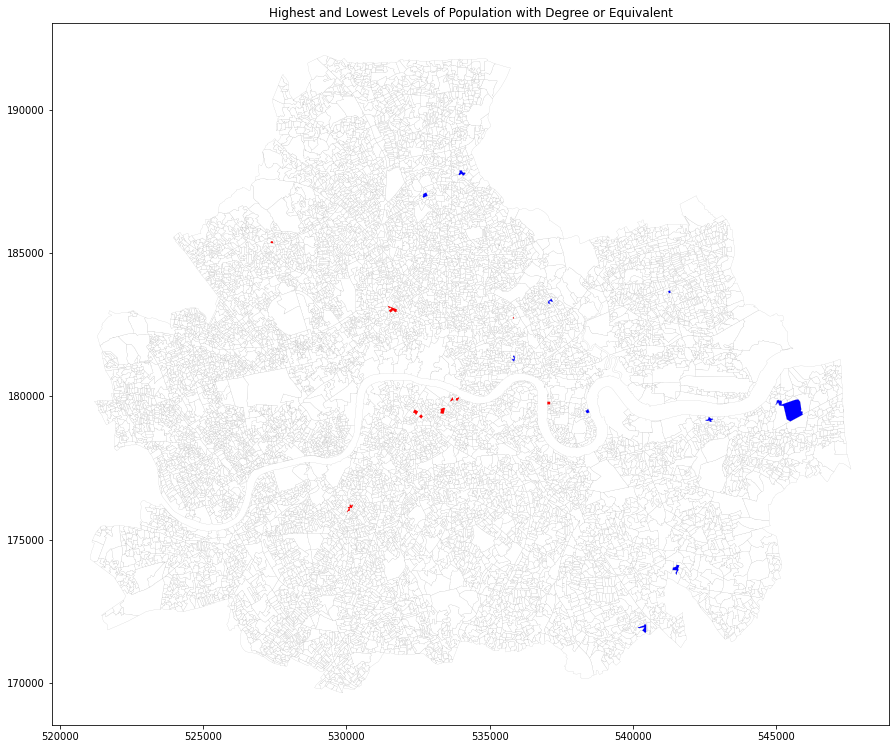

In [10]:
fig, ax = plt.subplots(figsize=(15,15))

ax.set_aspect('equal')
ax.set_title("Highest and Lowest Levels of Population with Degree or Equivalent")

df.plot(ax=ax, color='white', edgecolor='gray',linewidth=0.1)
df.head(10).plot(ax=ax,  color='red')
df.tail(10).plot(ax=ax,  color='blue')

plt.show()

<AxesSubplot:>

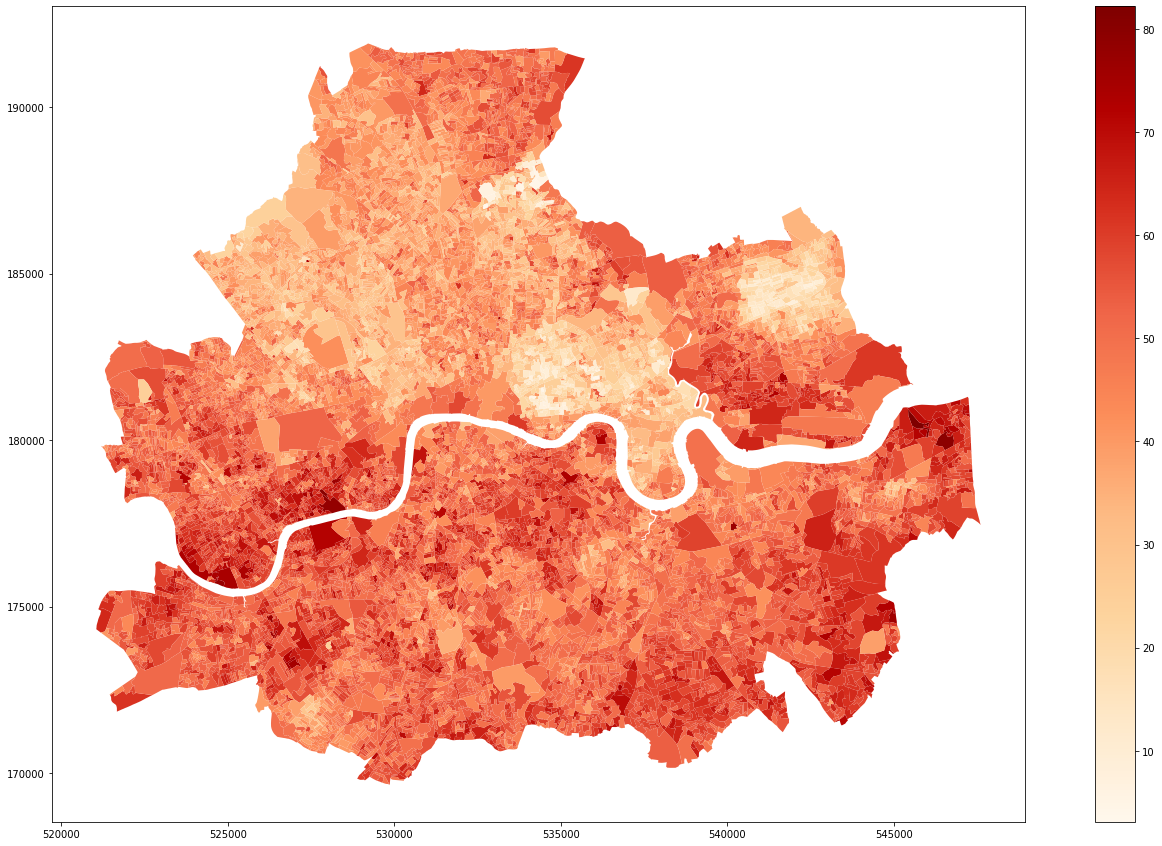

In [11]:
# London Religion - percentage as Christian
# KS209EW

sql = '''
select a.*, b.*, (cast (b.value as float) /a.value)*100 x, oa.*
from  censusdata as a
inner join censusdata as b
on b.geographycode = a.geographycode
inner join "OA" as oa
on a.geographycode = oa."OA11CD"
and a.key = 'KS209EW0001'
and b.key ='KS209EW0002'
and "LAD16NM" in ('Lewisham','Haringey','Lambeth','Southwark','Kensington and Chelsea','Hammersmith and Fulham',
'Camden','Greenwich','Wandsworth','Haringey','Newham','City of London','Islington', 'Barking & Dagenham',
'Tower Hamlets','Hackney','Westminster')
order by x desc
'''

df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry') 
df.plot(column='x', figsize=(25, 15), legend=True, cmap='OrRd')


<AxesSubplot:>

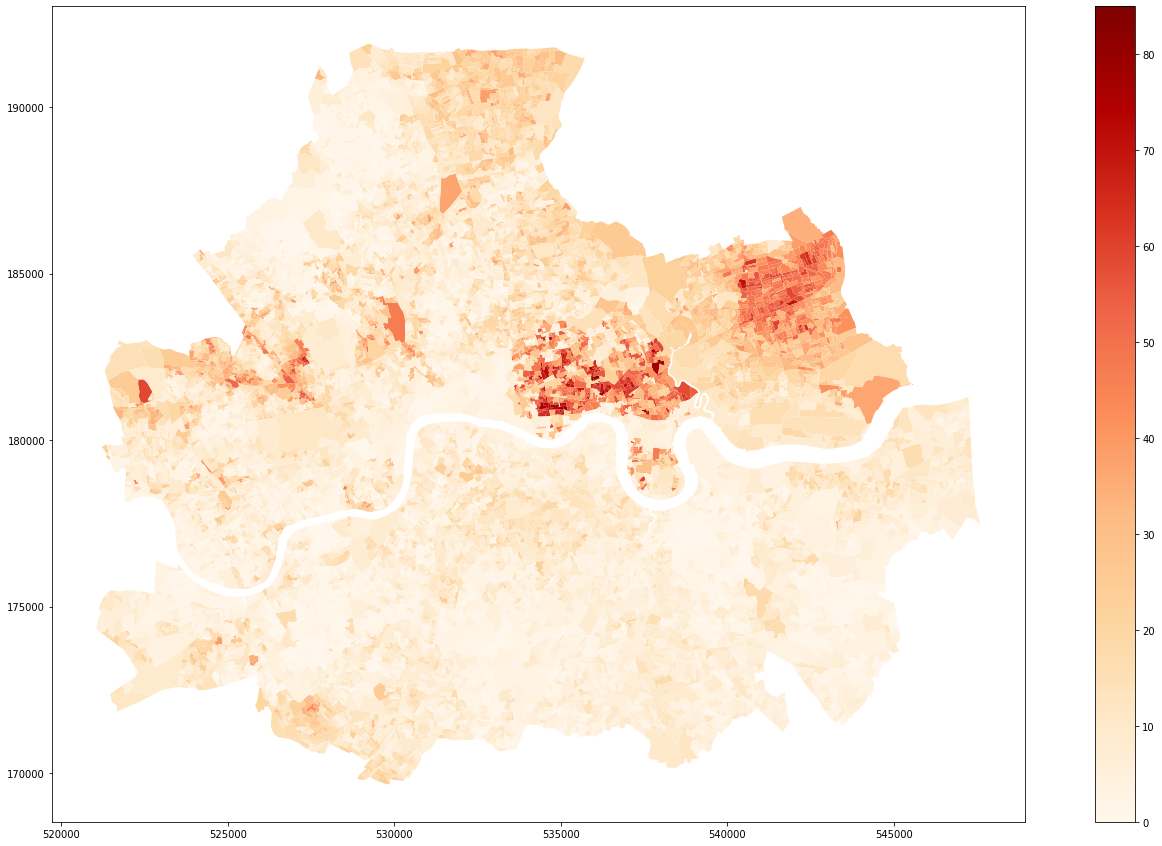

In [34]:
# London Religion - percentage as Muslim
# KS209EW

sql = '''
select a.*, b.*, (cast (b.value as float) /a.value)*100 x, oa.*
from  censusdata as a
inner join censusdata as b
on b.geographycode = a.geographycode
inner join "OA" as oa
on a.geographycode = oa."OA11CD"
and a.key = 'KS209EW0001'
and b.key ='KS209EW0006'
and "LAD16NM" in ('Lewisham','Haringey','Lambeth','Southwark','Kensington and Chelsea','Hammersmith and Fulham',
'Camden','Greenwich','Wandsworth','Haringey','Newham','City of London','Islington', 'Barking & Dagenham',
'Tower Hamlets','Hackney','Westminster')
order by x desc
'''

df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry') 
df.plot(column='x', figsize=(25, 15), legend=True, cmap='OrRd')

<AxesSubplot:>

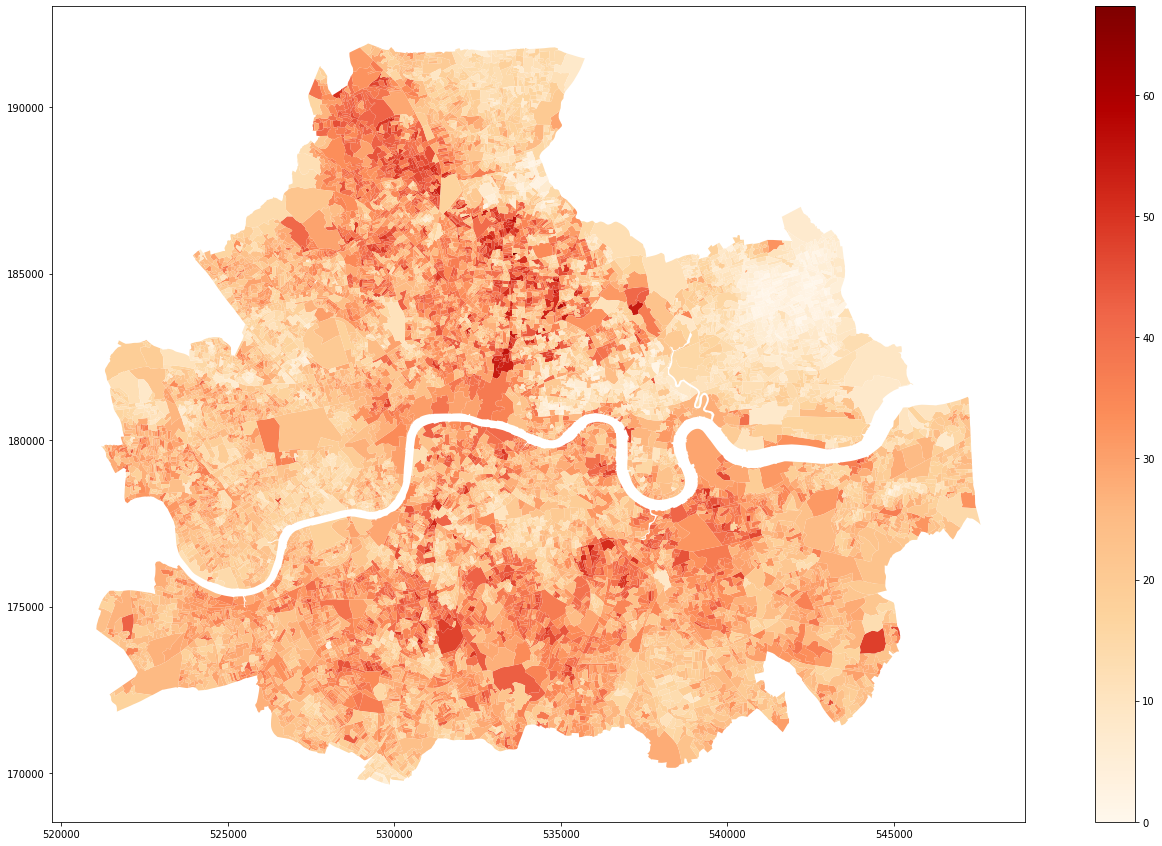

In [33]:
# London Religion - percentage as No Religion
# KS209EW

sql = '''
select a.*, b.*, (cast (b.value as float) /a.value)*100 x, oa.*
from  censusdata as a
inner join censusdata as b
on b.geographycode = a.geographycode
inner join "OA" as oa
on a.geographycode = oa."OA11CD"
and a.key = 'KS209EW0001'
and b.key ='KS209EW0009'
and "LAD16NM" in ('Lewisham','Haringey','Lambeth','Southwark','Kensington and Chelsea','Hammersmith and Fulham',
'Camden','Greenwich','Wandsworth','Haringey','Newham','City of London','Islington', 'Barking & Dagenham',
'Tower Hamlets','Hackney','Westminster')
order by x desc
'''

df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry') 
df.plot(column='x', figsize=(25, 15), legend=True, cmap='OrRd')

<AxesSubplot:>

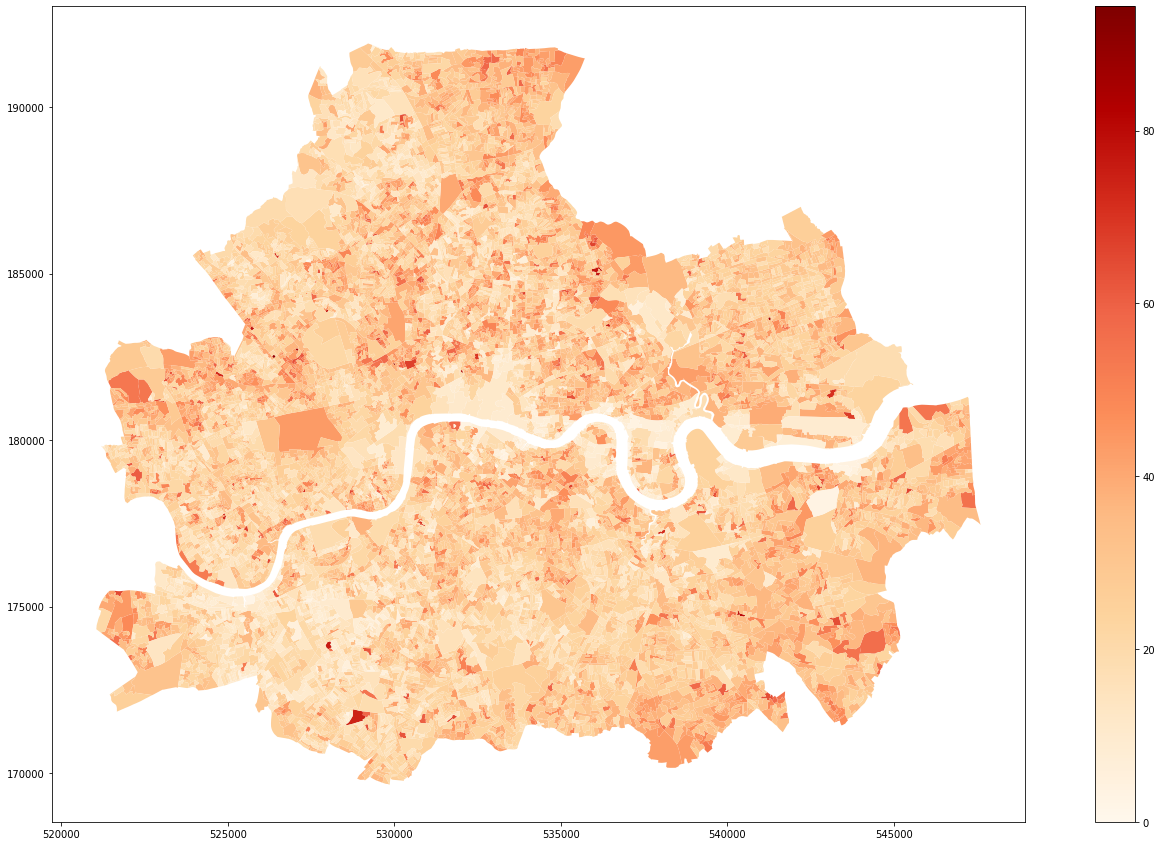

In [30]:
# CHECK 
# No adults in employment

sql = '''
select a.*, b.*, ((cast (b.value as float) + cast (c.value as float)) /a.value)*100 x, oa.*
from  censusdata as a
inner join censusdata as b
on b.geographycode = a.geographycode
inner join censusdata as c
on b.geographycode = c.geographycode
inner join "OA" as oa
on a.geographycode = oa."OA11CD"
and a.key = 'KS106EW0001'
and b.key ='KS106EW0002'
and c.key = 'KS106EW0003'
and "LAD16NM" in ('Lewisham','Haringey','Lambeth','Southwark','Kensington and Chelsea','Hammersmith and Fulham',
'Camden','Greenwich','Wandsworth','Haringey','Newham','City of London','Islington', 'Barking & Dagenham',
'Tower Hamlets','Hackney','Westminster')
order by x desc
'''

df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry') 
df.plot(column='x', figsize=(25, 15), legend=True, cmap='OrRd')

In [14]:
df.head()

geographycode          key  value     type geographycode          key  \
0     E00022902  KS106EW0001     89  KS106EW     E00022902  KS106EW0002   
1     E00004139  KS106EW0001    140  KS106EW     E00004139  KS106EW0002   
2     E00175263  KS106EW0001     84  KS106EW     E00175263  KS106EW0002   
3     E00167293  KS106EW0001     56  KS106EW     E00167293  KS106EW0002   
4     E00171521  KS106EW0001    115  KS106EW     E00171521  KS106EW0002   

   value     type          x  OBJECTID     OA11CD    LAD11CD    LAD16CD  \
0     40  KS106EW  89.887640     22230  E00022902  E09000032  E09000032   
1     53  KS106EW  75.714286      4058  E00004139  E09000007  E09000007   
2     31  KS106EW  73.809524    169861  E00175263  E09000033  E09000033   
3     20  KS106EW  71.428571    162717  E00167293  E09000013  E09000013   
4     39  KS106EW  67.826087    166567  E00171521  E09000022  E09000022   

                  LAD16NM     Shape__Are   Shape__Len  \
0              Wandsworth    9417.749535   405.036580   
1                  Camden    3249.521820   270.187461   
2             Westminster    7275.816498   446.549224   
3  Hammersmith and Fulham  528457.200500  3408.290290   
4                 Lambeth    1768.168701   204.493483   

                                            geometry  
0  POLYGON ((528166.862 173667.541, 528169.712 17...  
1  POLYGON ((527676.825 184786.964, 527677.214 18...  
2  POLYGON ((527328.852 182412.782, 527280.510 18...  
3  POLYGON ((522037.566 182087.181, 522036.836 18...  
4  POLYGON ((530644.266 176100.607, 530639.147 17...

<AxesSubplot:>

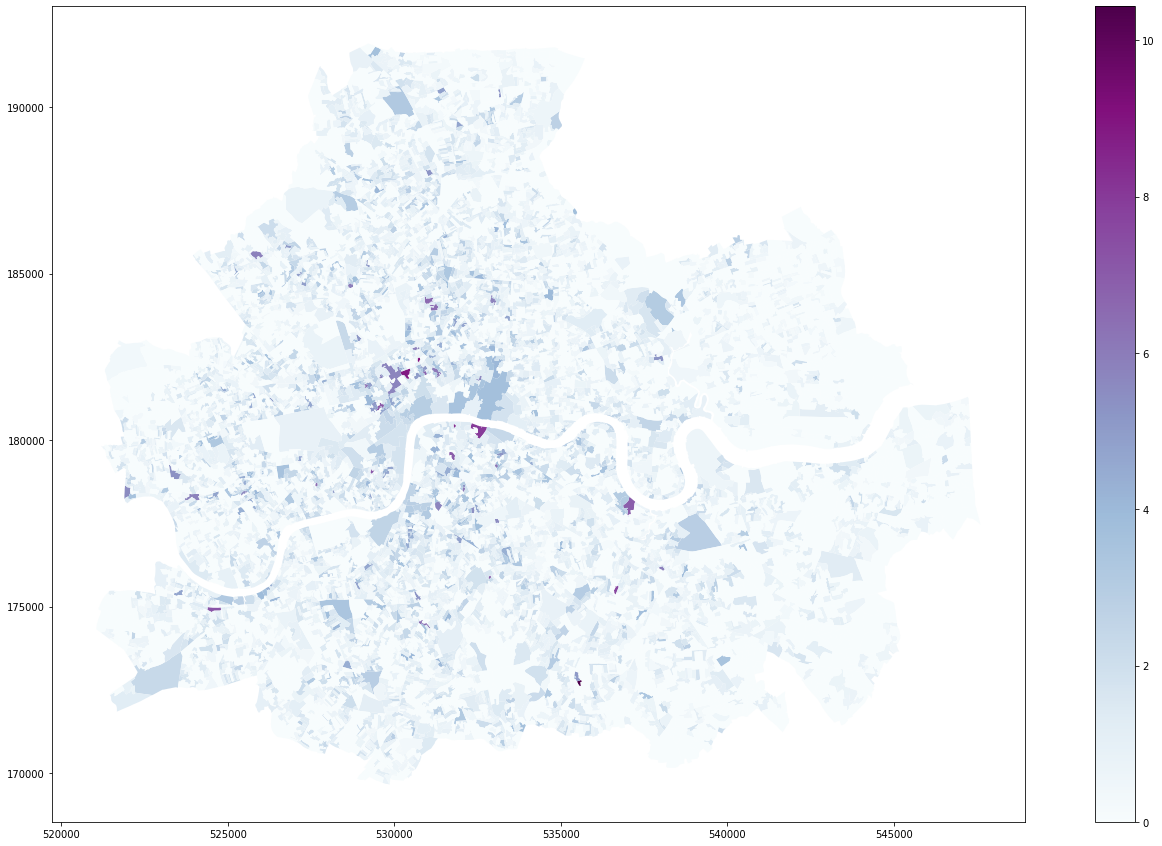

In [29]:
# % of people In a registered same-sex civil partnership

sql='''
select a.*, b.*, (cast (b.value as float) /a.value)*100 x, oa.*
from  censusdata as a
inner join censusdata as b
on b.geographycode = a.geographycode
inner join "OA" as oa
on a.geographycode = oa."OA11CD"
and a.key = 'KS103EW0001'
and b.key ='KS103EW0004'
and "LAD16NM" in ('Lewisham','Haringey','Lambeth','Southwark','Kensington and Chelsea','Hammersmith and Fulham',
'Camden','Greenwich','Wandsworth','Haringey','Newham','City of London','Islington', 'Barking & Dagenham',
'Tower Hamlets','Hackney','Westminster')
order by x desc
'''

df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry') 
df.plot(column='x', figsize=(25, 15), legend=True, cmap='BuPu')

<AxesSubplot:>

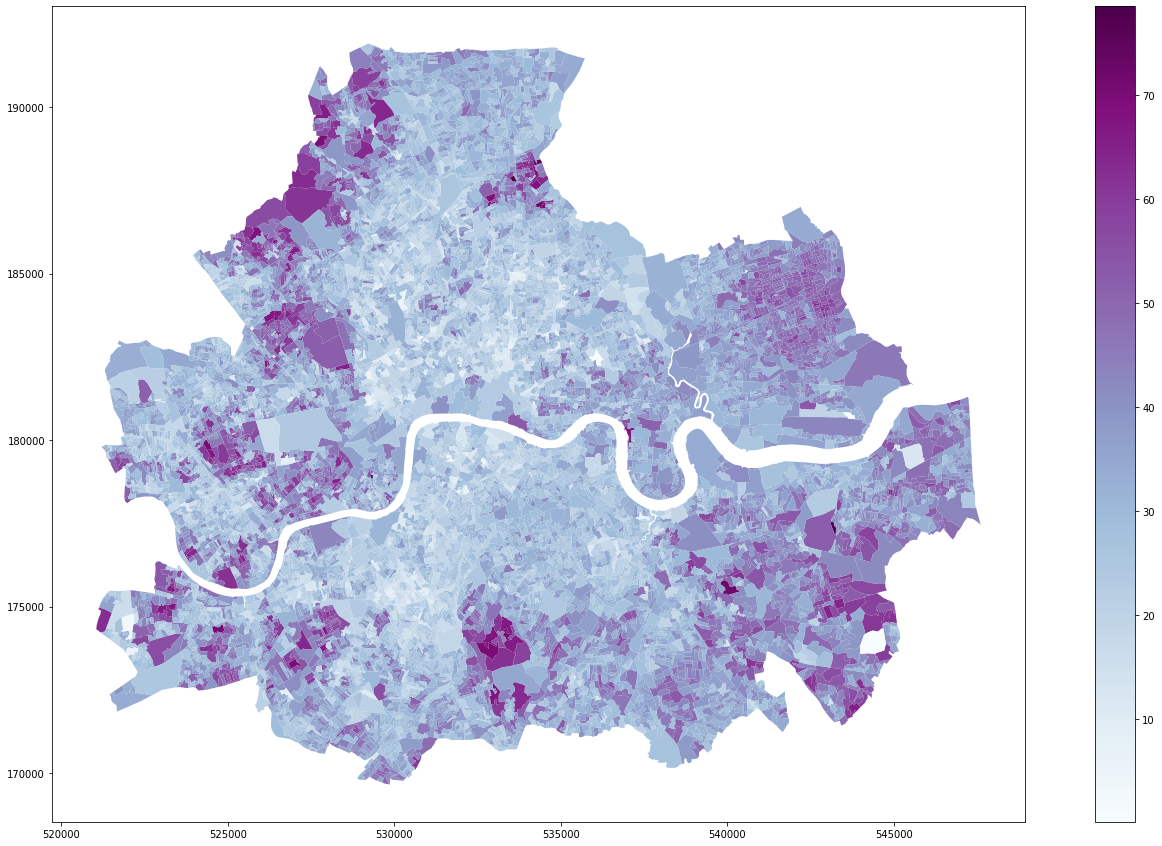

In [28]:
# % of people Married

sql='''
select a.*, b.*, (cast (b.value as float) /a.value)*100 x, oa.*
from  censusdata as a
inner join censusdata as b
on b.geographycode = a.geographycode
inner join "OA" as oa
on a.geographycode = oa."OA11CD"
and a.key = 'KS103EW0001'
and b.key ='KS103EW0003'
and "LAD16NM" in ('Lewisham','Haringey','Lambeth','Southwark','Kensington and Chelsea','Hammersmith and Fulham',
'Camden','Greenwich','Wandsworth','Haringey','Newham','City of London','Islington', 'Barking & Dagenham',
'Tower Hamlets','Hackney','Westminster')
order by x desc
'''

df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry') 
df.plot(column='x', figsize=(25, 15), legend=True, cmap='BuPu')